<a href="https://colab.research.google.com/github/anhle/leetcode/blob/master/30_day_leetcoding_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#30-Day LeetCoding Challenge
1. [week1](#1)
2. [week2](#2)
3. [week3](#3)
4. [week4](#4)
5. [week 5](#5)

# Week1 <a name="1"></a>

## [Single Number](https://leetcode.com/explore/challenge/card/30-day-leetcoding-challenge/528/week-1/3283/)

**Approach 2**: Hash Table
Algorithm

We use hash table to avoid the O(n)O(n) time required for searching the elements.

* Iterate through all elements in nums and set up key/value pair.
* Return the element which appeared only once.

In [ ]:
from collections import defaultdict

def singleNumber(nums):
    hash_table = defaultdict(int)
    for i in nums:
        hash_table[i] +=1
    for i in hash_table:
        if hash_table[i] == 1:
            return i

print(singleNumber([4,1,2,1,2]))

**Approach 4**: Bit Manipulation
Concept

If we take XOR of zero and some bit, it will return that bit
a \oplus 0 = aa⊕0=a
If we take XOR of two same bits, it will return 0
a \oplus a = 0a⊕a=0
a \oplus b \oplus a = (a \oplus a) \oplus b = 0 \oplus b = ba⊕b⊕a=(a⊕a)⊕b=0⊕b=b
So we can XOR all bits together to find the unique number.

In [ ]:
def singleNumber(nums):
    a = 0
    for i in nums:
        a ^= i
    return a

##[HappyNumber](https://leetcode.com/problems/happy-number/)

**Approach 1:** use hashset to record values

In [ ]:
def isHappy(n):
    seen = set()
    while n != 1:
        sum = 0
        while n != 0:
            digit = n%10
            sum += (digit)*(digit)
            n //=10
        if sum == 1:
            return True
        else:
            if sum in seen:
                return False
            else:
                seen.add(sum)
                n = sum
    return True
print(isHappy(19))

**Approach 2:** we can apply the Floyd Cycle Detection (the one we used in Detect Linked List Cycle) on this problem 

In [ ]:
def isHappy(self, n: int) -> bool:
    def next(n):
        square = 0
        while n != 0:
            digit = n%10
            n //=10
            square += digit*digit
        return square
    
    slow,fast = n,next(n)
    while slow != fast:
        slow = next(slow)
        fast = next(next(fast))
        
    return slow == 1

##[Maximum Subarray](https://leetcode.com/problems/maximum-subarray/)

**Aproach 1: DP algorithm**. 
Hint: maximum -> optimization prob -> DP

+ **optimal substructures**: the maximum subarray ending at each position is calculated in a simple way from a related but smaller
+ **overlapping subproblem**: the maximum subarray ending at the previous position 

Suppose we've solved the problem for A[1 .. i - 1]; how can we extend that to A[1 .. i]? The maximum
sum in the first i elements is either:
* the maximum sum in the first i - 1 elements (which we'll call MaxSoFar), or 
* a subvector that ends in position i (which we'll call MaxEndingHere).
> * MaxEndingHere is either A[i] plus the previous MaxEndingHere, or just A[i], whichever is larger.



Time : O(n)


In [ ]:
def maxSubArray(nums):
    maxEndHere = [0]*len(nums)
    maxEndHere[0] = nums[0]
    for i in range(1,len(nums)):
        maxEndHere[i] = nums[i] + max(0,maxEndHere[i-1])
    return max(maxEndHere)

maxSubArray([-2,1,-3,4,-1,2,1,-5,4])

6

In [ ]:
def maxSubArray(nums):
    maxSoFar,maxEndHere = nums[0],nums[0]
    for i in range(1,len(nums)):
        maxEndHere = max(maxEndHere+nums[i],nums[i])# extend subarray or start over
        maxSoFar = max(maxSoFar,maxEndHere)
    return maxSoFar

** Divide and Conquer**

The Divide-and-Conquer algorithm breaks nums into two halves and find the maximum subarray sum in them recursively. The solution can lie entirely in left or in right or span in between. Well, the most tricky part is to handle the case that *the maximum subarray spans the two halves*. For this case, we use a linear algorithm: starting from the middle element and move to both ends (left and right ends), record the maximum sum we have seen. In this case, the maximum sum is finally equal to the middle element plus the maximum sum of moving leftwards and the maximum sum of moving rightwards.

- Time: O(nlogn)

In [ ]:
def maxSubArray(nums):
        return helper(nums, 0, len(nums)-1)
    
def helper(nums, low, high):
    if low > high:
        return 0
    if low == high:
        return nums[low]
    mid = low + (high-low)//2
    x_left = helper(nums, low, mid)
    x_right = helper(nums, mid+1, high)
    lmax, rmax = float('-inf'), float('-inf')
    lsum, rsum = 0,0
    for i in range(mid-1, low-1, -1): ### Important Insight in NlgN solutions
        lsum = lsum + nums[i]
        lmax = max(lmax, lsum)
    for i in range(mid+1, high+1, 1):
        rsum = rsum + nums[i]
        rmax = max(rmax, rsum)
    return max(x_left, x_right, max(0,lmax)+max(0,rmax)+nums[mid])       

maxSubArray([-2,1,-3,4,-1,2,1,-5,4])


6

##[Move Zeroes](https://leetcode.com/problems/move-zeroes)


**Approach #2** two pointers

The fast pointer which is denoted by variable "cur" does the job of processing new elements. If the newly found element is not a 0, we record it just after the last found non-0 element. The position of last found non-0 element is denoted by the slow pointer "lastNonZeroFoundAt" variable. As we keep finding new non-0 elements, we just overwrite them at the "lastNonZeroFoundAt + 1" 'th index.

In [ ]:
def moveZeroes(nums):
    last_non_zero_pos = 0
    for i in range(len(nums)):
        if nums[i] != 0:
            nums[last_non_zero_pos] = nums[i]
            last_non_zero_pos += 1
    for i in range(last_non_zero_pos,len(nums)):
        nums[i] = 0
a=[0,1,0,3,12]
moveZeroes(a)
a

[1, 3, 12, 0, 0]

##[Group Anagrams](https://leetcode.com/problems/group-anagrams/)

**Approach 1:** Categorize by Sorted String
* Intuition: Two strings are anagrams if and only if their sorted strings are equal.

Algorithm

Maintain a map ans : {String -> List} where each key K is a sorted string, and each value is the list of strings from the initial input that when sorted, are equal to K.

* Time Complexity: O(NKlogK)
* Space :O(NK)


In [5]:
import collections
def groupAnagrams(strs):
    groups = collections.defaultdict(list)
    for s in strs:
        groups[tuple(sorted(s))].append(s)
    return groups.values()

print(groupAnagrams(["eat","tea","tan","ate","nat","bat"]))

dict_values([['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']])


**Approach 2:** Categorize by Count
* Intuition: Two strings are anagrams if and only if their character counts (respective number of occurrences of each character) are the same.

In [ ]:
import collections
def groupAnagrams(strs):
      group = collections.defaultdict(list)
      for s in strs:
        cnt = [0]*26
        for i in s:
            cnt[ord(i)-ord('a')] +=1

        group[tuple(cnt)].append(s)
      return group.values()
 

print(groupAnagrams(["eat","tea","tan","ate","nat","bat"]))

##[122. Best Time to Buy and Sell Stock II](https://leetcode.com/problems/best-time-to-buy-and-sell-stock-ii)

**Approach 2:** Peak Valley Approach
The key point is we need to consider every peak immediately following a valley to maximize the profit.

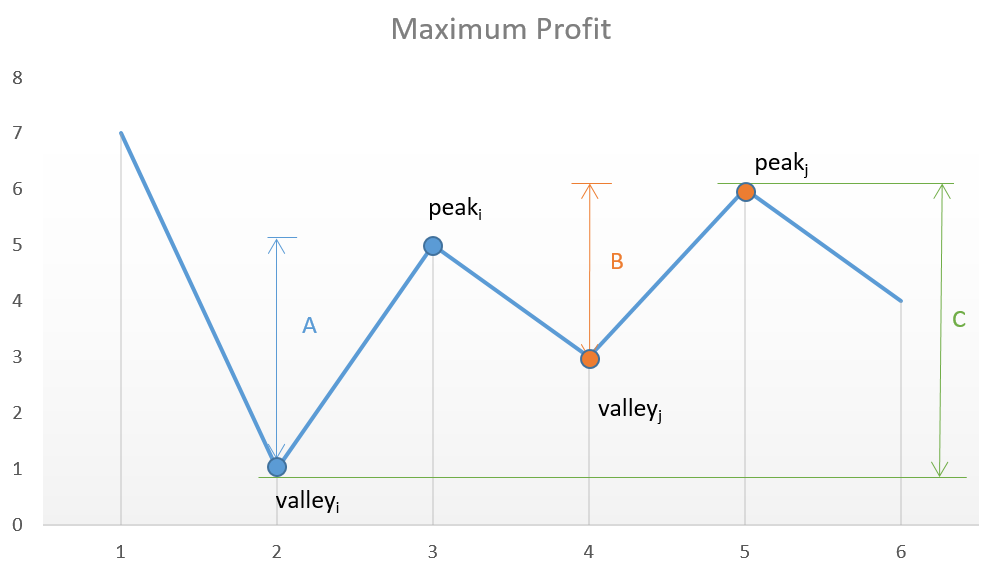

In [ ]:
def maxProfit(prices):
    i,profit=0,0
    while i < len(prices) -1:
        while i < len(prices) -1 and prices[i] >= prices[i+1]:
            i += 1
        buy = prices[i]
        while i < len(prices) -1 and prices[i] <= prices[i+1]:
            i += 1
        sell = prices[i]
        profit += sell - buy
        
    return profit

print(maxProfit([7,1,5,3,6,4]))

# Week2 <a name="2"></a>

## [Middle of the Linked List](https://leetcode.com/problems/middle-of-the-linked-list/)


**Approach 2:** Fast and Slow Pointer

Intuition and Algorithm

When traversing the list with a pointer slow, make another pointer fast that traverses twice as fast. When fast reaches the end of the list, slow must be in the middle.

In [ ]:
def middleNode(self, head: ListNode) -> ListNode:
  slow,fast = head,head
  while fast != None and fast.next != None:
      slow = slow.next
      fast = fast.next.next
  return slow

##[844. Backspace String Compare](https://leetcode.com/problems/backspace-string-compare)

**Approach #1:** Build String

Intuition

Let's individually build the result of each string (build(S) and build(T)), then compare if they are equal.

Algorithm

To build the result of a string build(S), we'll use a stack based approach, simulating the result of each keystroke.

* Time Complexity: O(M+N), respectively.

* Space Complexity: O(M+N).

In [ ]:
def backspaceCompare(S,T):
    def helper(str):
        res = []
        for c in str:
            if c == "#":
                if res:
                    res.pop()
            else:
                res.append(c)
        return res
    return helper(S)==helper(T)

backspaceCompare("ab#c","ad#c")

**Approach #2:** Two Pointer
Intuition

When writing a character, it may or may not be part of the final string depending on how many backspace keystrokes occur in the future.

If instead we iterate through the string in reverse, then we will know how many backspace characters we have seen, and therefore whether the result includes our character.

In [ ]:
def backspaceCompare(self, S: str, T: str) -> bool:
    #helper method to find the next unskippable character in the string and return
    #its index. Return -1 if the string is exhausted.
    def nextNonSkipChar(S,i):
        skip = 0
        while i >= 0:
            #if current char is #, we need to skip next character
            if S[i] =='#':
                skip += 1
                i -= 1
            #if current character is not #, but we still have some characters need to be skipped
            elif skip > 0:
                skip -= 1
                i -= 1
            #in case this is the character we cannot skip
            else:
                break       
        return i
           
    i,j = len(S)-1,len(T)-1
    # start compare string from the end
    while i >= 0 or j >= 0:
        i = nextNonSkipChar(S,i)
        j = nextNonSkipChar(T,j)       
        if i < 0: 
            return j < 0
        if j < 0:
            return i < 0
        if S[i] != T[j]:
            return False
        i,j = i-1,j-1
    
    return True

[155.MinStack](https://leetcode.com/problems/min-stack)

**Approach 1:** Consider each node in the stack having a minimum value

In [ ]:
class MinStack:
    def __init__(self):
        self.stack=[]
        
    def push(self, x: int) -> None:
        cur_min = self.getMin()
        if cur_min == None or x < cur_min:
            cur_min = x
        self.stack.append((x,cur_min))
    def pop(self) -> None:
        self.stack.pop()

    def top(self) -> int:
        return self.stack[-1][0]
        
    def getMin(self) -> int:
        if len(self.stack) == 0:
            return None
        else:
            return self.stack[-1][1]

##[543. Diameter of Binary Tree](https://leetcode.com/problems/diameter-of-binary-tree/)

**Approach #1:** Depth-First Search 

Intuition

Any path can be written as two arrows (in different directions) from some node, where an arrow is a path that starts at some node and only travels down to child nodes.

If we knew the maximum length arrows L, R for each child, then the best path touches L + R + 1 nodes.

Algorithm

Let's calculate the depth of a node in the usual way: max(depth of node.left, depth of node.right) + 1. While we do, a path "through" this node uses 1 + (depth of node.left) + (depth of node.right) nodes. Let's search each node and remember the highest number of nodes used in some path. The desired length is 1 minus this number.

* Time Complexity: O(N). We visit every node once.

* Space Complexity: O(N), the size of our implicit call stack during our depth-first search.

In [ ]:
def diameterOfBinaryTree(self, root: TreeNode) -> int:
    self.ans = 1
    def depth(node):
        # base case
        if not node:
            return 0
        left = depth(node.left)
        right = depth(node.right)
        self.ans = max(self.ans,left + right +1)
        return max(left,right) +1
    
    depth(root)
    return self.ans -1

* max diameter of tree = max(path go through root, max diameter of left subtree, max diameter of right subtree ( not go through root) )
* path go through root = max left depth + max right depth +1

In [ ]:
def diameterOfBinaryTree(self, root: TreeNode) -> int:
    def helper(node):
        if not node:
            return 0, -1
        l_diameter, l_path = helper(node.left)
        r_diameter, r_path = helper(node.right)
        diameter = max(l_diameter, r_diameter, 2 + l_path + r_path)
        path = 1 + max(l_path, r_path)
        return diameter, path


    return helper(root)[0]        

##[1046. Last Stone Weight](https://leetcode.com/problems/last-stone-weight/)

Explanation
Put all elements into a priority queue.
Pop out the two biggest, push back the difference,
until there are no more two elements left.

In [ ]:
import heapq
def lastStoneWeight(stones) :
    h = [-x for x in stones]
    heapq.heapify(h)
    while len(h) > 1:
        x=heapq.heappop(h)
        y=heapq.heappop(h)
        if x != y:
            heapq.heappush(h,x-y)
    return -h[0] if len(h)>0 else 0

lastStoneWeight([2,7,4,1,8,1])

[525. Contiguous Array](https://leetcode.com/problems/contiguous-array/)

**Approach 1:** Brute Force
We consider every possible subarray within the given array and count the number of zeros and ones in each subarray. Then, we find out the maximum size subarray with equal no. of zeros and ones out of them.

* Time complexity : O(n^2). We consider every possible subarray by traversing over the complete array for every start point possible

**Approach 2:**Using hashtable

Instead of two counter for zeros and ones. We are going to have a cumulative placeholder variable count.
* For every 0 we see, we are going to subtract 1 from count.
* For every 1 we see, we are going to add 1 to count.
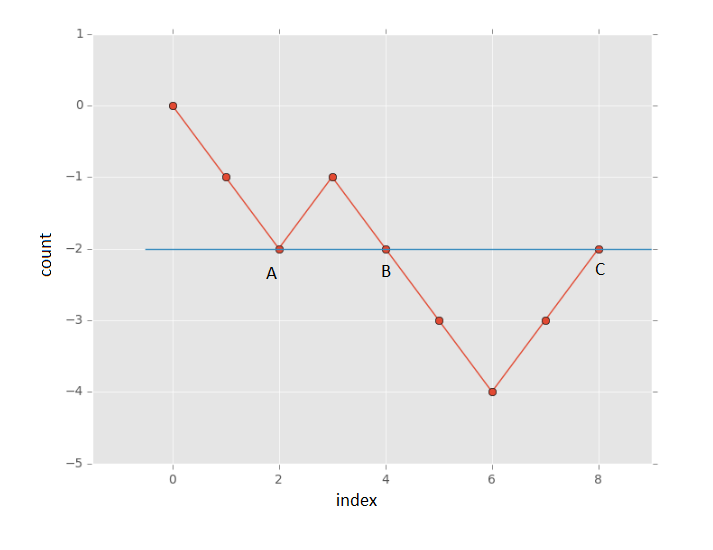

In [ ]:
def findMaxLength(self, nums: List[int]) -> int:
    dict = {0:-1} # key is count, value is the first index its appear
    maxSoFar = 0
    cnt = 0
    for i in range(len(nums)):
        if nums[i] == 0:
            cnt -= 1
        else:
            cnt += 1
        if cnt not in dict:
            dict[cnt] = i
        else: # found equal 1s and 0s
            maxSoFar = max(maxSoFar,i-dict[cnt])
    
    return maxSoFar

# Week 3 <a name="3"></a>


[Product of Array Except Self](https://leetcode.com/problems/product-of-array-except-self)

**Approach 1:** Left and Right product lists

Instead of dividing the product of all the numbers in the array by the number at a given index to get the corresponding product, we can make use of the product of all the numbers to the left and all the numbers to the right of the index. Multiplying these two individual products would give us the desired result as well.
* Space: O(n)

In [ ]:
def productExceptSelf(nums):
    n =len(nums)
    left,right,ans = [0]*n,[0]*n,[0]*n
    left[0] = 1 # element at index 0, there is no element to the left
    right[n-1] = 1 # element at index n-1, there is no element to the right
    for i in range(1,n):
        left[i] = nums[i-1]*left[i-1]
    for i in range(n-2,-1,-1):
        right[i] = nums[i+1]*right[i+1]
    for i in range(n):
        ans[i] = left[i]*right[i]
    return ans

print(productExceptSelf([1,2,3,4]))

**Approach 2:** O(1) space approach
Understandably so, the output array does not count towards the space complexity. Basically, we will be using the output array as one of L or R and we will be constructing the other one on the fly. Let's look at the algorithm based on this idea.

Algorithm

1. Initialize the empty answer array where for a given index i, answer[i] would contain the product of all the numbers to the left of i.
2.we don't explicitly build the R array from before. Instead, we simply use a variable to keep track of the running product of elements to the right and we keep updating the answer array by doing answer[i] = answer[i] * R

In [ ]:
def productExceptSelf(self, nums: List[int]) -> List[int]:
    n =len(nums)
    left = [0]*n
    left[0] = 1 # element at index 0, there is no element to the left
    
    for i in range(1,n):
        left[i] = nums[i-1]*left[i-1]
    
    runningRight = 1
    for i in range(n-1,-1,-1):
        left[i] = left[i]*runningRight
        runningRight *= nums[i]

    return left

##[678. Valid Parenthesis String](https://leetcode.com/problems/valid-parenthesis-string)

**Approach #1:** Brute Force 

For each asterisk, let's try both possibilities: (,or ), or empty
* Time: O(n*3^n)
Intuition: potiential subproblem -> DP

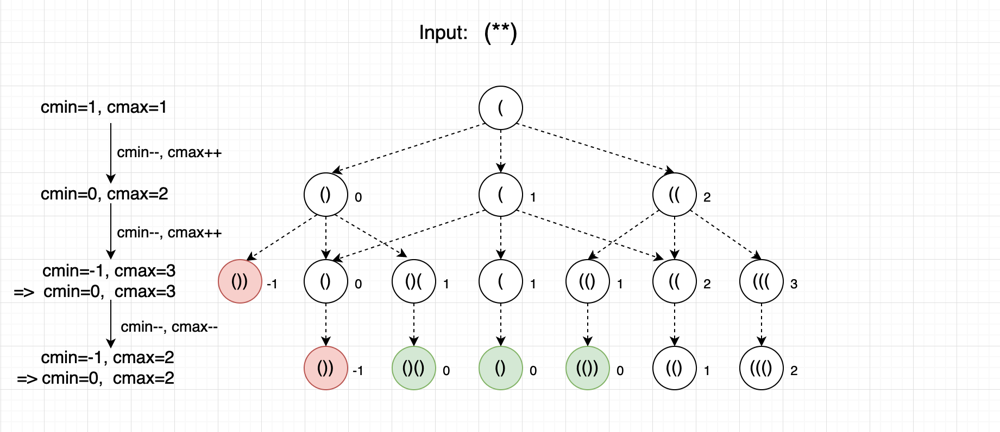

In [ ]:
def checkValidString(self, s: str) -> bool:
    n = len(s)
    memo = [[0]*n for _ in range(n)]
    
    def helper(idx,cnt):
        if idx == len(s):
            return cnt == 0
        if memo[idx][cnt]>0:
            return memo[idx][cnt]
        if s[idx] =='(':
            memo[idx][cnt] = helper(idx+1,cnt+1)
        elif s[idx] ==')':
            memo[idx][cnt] = cnt != 0 and helper(idx+1,cnt-1)
        else:
            memo[idx][cnt] = helper(idx+1,cnt) or helper(idx+1,cnt+1) or \
            (cnt != 0 and helper(idx+1,cnt-1))
        return memo[idx][cnt]
    
    return helper(0,0)

**Approach #2:** Dynamic Programming 
1. **Overlapping Subproblems**: solutions of same subproblems are needed again and again. During the generate string, we need to check the interval [i..j] is valid parathesis string or not, again and again
2. **Optimal Substructure:**

Let dp[i][j] be true if and only if the interval s[i:j] can be made valid. Then dp[i][j] is true only if:

* s[i] is '*', and the interval s[i+1:j] can be made valid;

* s[i] can be made to be '(', and there is some k in [i+1,..,k,.., j] such that s[k] can be made to be ')', plus the two intervals (s[i+1: k] and s[k+1: j+1]) can be made valid;


**Greedy**: 

Intuition

When checking whether the string is valid, we only cared about the "balance": the number of extra, open left brackets as we parsed through the string. For example, when checking whether '(()())' is valid, we had a balance of 1, 2, 1, 2, 1, 0 as we parse through the string. 

if we have string '(***)', then as we parse each symbol, the set of possible values for the balance is [1] for '('; [0, 1, 2] for '(*'. Furthermore, we can prove these states always form a contiguous interval. Thus, we only need to know the left and right bounds of this interval.

**Algorithm**

Let lo, hi respectively be the smallest and largest possible number of open left brackets after processing the current character in the string.

If we encounter a left bracket '(', then lo++, otherwise we could write a right bracket, so lo--. If we encounter what can be a left bracket (c != ')'), then hi++, otherwise we must write a right bracket, so hi--. If hi < 0, then the current prefix can't be made valid no matter what our choices are. Also, we can never have less than 0 open left brackets. At the end, we should check that we can have exactly 0 open left brackets.

In [ ]:
def checkValidString(s):
    lo,hi = 0,0
    for c in s:
        lo += 1 if c =='(' else -1
        hi += 1 if c in '(*' else -1
        if hi < 0 :
            break
        lo = max(lo,0)
    return lo == 0

##[33.Search in Rotated Sorted Arra](https://leetcode.com/problems/search-in-rotated-sorted-array/)

In [ ]:
def search(nums, target) :
    left, right = 0,len(nums)-1
    while left <= right:
        mid = (left+right)//2
        #if found the target
        if nums[mid] == target:
            return mid
        # if pivot at the left side of original array, ex: 6 7|1 2 3 4 5
        if nums[mid] < nums[left]:
            # if target in ascending order side, ex target = 4
            if nums[mid] < target <= nums[right]:
                left = mid +1
            else:
                right = mid -1
        else: #pivot at the right side of original array, ex: 3 4 5 6 7 | 1 2
            # if target in ascending order side
            if nums[left] <= target < nums[mid]:
                right = mid -1
            else:
                left = mid +1
    return -1
search([4,5,6,7,0,1,2],0)

##[1008. Construct Binary Search Tree from Preorder Traversal](https://leetcode.com/problems/construct-binary-search-tree-from-preorder-traversal/)

In [ ]:
def bstFromPreorder(preorder):
    def helper(left,right):
        if left >= right:
            return None
        root = TreeNode(preorder[left])
        i = left +1
        while i < right and preorder[i] < root.val:
            i += 1
        root.left = helper(left+1,i)
        root.right = helper(i,right)
        return root
    return helper(0,len(preorder))

##[64. Minimum Path Sum](https://leetcode.com/problems/minimum-path-sum)

**Approach 1:** DP

Suppose the minimum path sum of arriving at point (i, j) is S[i][j], then the state equation is S[i][j] = min(S[i - 1][j], S[i][j - 1]) + grid[i][j].

Well, some boundary conditions need to be handled. The boundary conditions happen on the topmost row (S[i - 1][j] does not exist) and the leftmost column (S[i][j - 1] does not exist).

In [3]:
def minPathSum(grid):
    rows,cols = len(grid),len(grid[0])
    dp = [[0]*cols for _ in range(rows)]
    dp[0][0] = grid[0][0]
    for i in range(1,rows):
        dp[i][0] = dp[i-1][0] + grid[i][0]
    for j in range(1,cols):
        dp[0][j] = dp[0][j-1] + grid[0][j]
    for i in range(1,rows):
        for j in range(1,cols):
            dp[i][j] = min(dp[i][j-1],dp[i-1][j]) + grid[i][j]
    return dp[-1][-1]
minPathSum([
  [1,3,1],
  [1,5,1],
  [4,2,1]
])

7

In [ ]:
def minPathSum(grid):
    rows,cols = len(grid),len(grid[0])
    dp = [0]*cols
    dp[0] = grid[0][0]
    for j in range(1,cols):
        dp[j] = dp[j-1] + grid[0][j]
    
    for i in range(1,rows):
        dp[0] += grid[i][0]
        for j in range(1,cols):
            dp[j] = min(dp[j-1],dp[j]) + grid[i][j]
    return dp[-1]

##[200. Number of Islands](https://leetcode.com/problems/number-of-islands/)

In [14]:
def numIslands(grid):
    if not grid:
        return 0        
    count = 0
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == '1':
                dfs(grid, i, j)
                count += 1
    return count

def dfs(grid, i, j):
    if i<0 or j<0 or i>=len(grid) or j>=len(grid[0]) or grid[i][j] != '1':
        return
    grid[i][j] = '#'
    dfs(grid, i+1, j)
    dfs(grid, i-1, j)
    dfs(grid, i, j+1)
    dfs(grid, i, j-1)
grid=[["1","1","0","0","0"],["1","1","0","0","0"],["0","0","1","0","0"],["0","0","0","1","1"]]
numIslands(grid)

3

#Week 4<a name="4"></a>

##[560. Subarray Sum Equals K](https://leetcode.com/problems/subarray-sum-equals-k)

**Approach 2: Using Cumulative Sum**
Algorithm

Instead of considering all the startstart and endend points and then finding the sum for each subarray corresponding to those points, we can directly find the sum on the go while considering different endend points. i.e. We can choose a particular startstart point and while iterating over the endend points, we can add the element corresponding to the endend point to the sum formed till now. Whenver the sumsum equals the required kk value, we can update the countcount value

* Time complexity : O(n^2). We need to consider every subarray possible.

* Space complexity : O(1)

In [ ]:
def subarraySum(nums, k):
    cnt = 0
    for start in range(len(nums)):
        sum = 0
        for end in range(start,len(nums)):
            sum += nums[end]
            if sum == k:
                cnt += 1
    return cnt
subarraySum([1,1,1],2)

In [ ]:
def subarraySum(nums, k):
    count = collections.Counter()
    count[0] = 1
    ans = sum = 0
    for x in nums:
        sum += x
        ans += count[sum-k]
        count[sum] += 1
    return ans

##[Bitwise AND of Numbers Range]()

**Approach 1**: find the common prefix of m and n 's binary code

The idea is very simple:

1. last bit of (odd number & even number) is 0.
2. when m != n, There is at least an odd number and an even number, so the last bit position result is 0.
3. Move m and n rigth a position.

Keep doing step 1,2,3 until m equal to n, use a factor to record the iteration time.

In [ ]:
def rangeBitwiseAnd(self, m: int, n: int) -> int:
    cntMove = 0 # cnt bit 0 on the right
    #when m != n. There is at least an odd number and an even number, so the last bit position result is 0.
    while m !=n: 
        n >>= 1
        m >>= 1
        cntMove += 1
    return m<<cntMove

##[1143. Longest Common Subsequence](https://leetcode.com/problems/longest-common-subsequence/)

**Approach 1** Bottom-up DP 

utilizes a matrix m where we track LCS sizes for each combination of i and j.

* If a[i] == b[j], LCS for i and j would be 1 plus LCS till the i-1 and j-1 indexes.
* Otherwise, we will take the largest LCS if we skip a charracter from one of the string (max(m[i - 1][j], m[i][j - 1]).

This picture shows the populated matrix for "xabccde", "ace" test case.
image


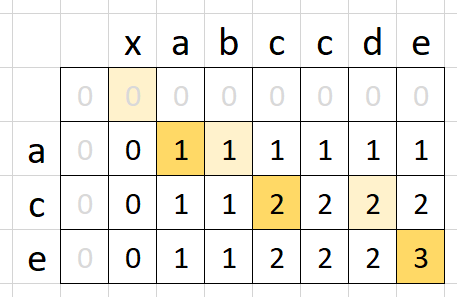


In [ ]:
def longestCommonSubsequence(text1, text2):
    n,m = len(text1),len(text2)
    dp = [[0]*(m+1) for _ in range(n+1)]
    for i in range(n):
        for j in range(m):
            if text1[i] == text2[j]:
                dp[i+1][j+1] = 1 + dp[i][j]
            else:
                dp[i+1][j+1] = max(dp[i][j+1],dp[i+1][j]) 
    return dp[-1][-1]

longestCommonSubsequenc("abcde","ace")

In [ ]:
def longestCommonSubsequence(text1, text2):
    n,m = len(text1),len(text2)
    dp = [0]*(m+1)
    for i in range(n):
        prevRow,prevRowPrevCol = 0,0
        for j in range(m):
            prevRowPrevCol = prevRow
            prevRow = dp[j+1]                 
            if text1[i] == text2[j]:
                dp[j+1] = 1 + prevRowPrevCol
            else:   
                dp[j+1] = max(prevRow,dp[j]) 
    return dp[-1]

##[221. Maximal Square](https://leetcode.com/problems/maximal-square/)

**Approach #1 Brute Force **

Find out every possible square of 1’s that can be formed from within the matrix. The question now is – how to go for it?

We use a variable to contain the size of the largest square found so far and another variable to store the size of the current, both initialized to 0. Starting from the left uppermost point in the matrix, we search for a 1. No operation needs to be done for a 0. Whenever a 1 is found, we try to find out the largest square that can be formed including that 1. For this, we move diagonally (right and downwards), i.e. we increment the row index and column index temporarily and then check whether all the elements of that row and column are 1 or not. If all the elements happen to be 1, we move diagonally further as previously. If even one element turns out to be 0, we stop this diagonal movement and update the size of the largest square.

* Time complexity : O((mn)^ 2. In worst case, we need to traverse the complete matrix for every 1.
* Space complexity : O(1). No extra space is used.

**Aproach : DP** 
What's the largest (full-of-ones-)square ending at (i,j), meaning lower right corner in row i, column j? 

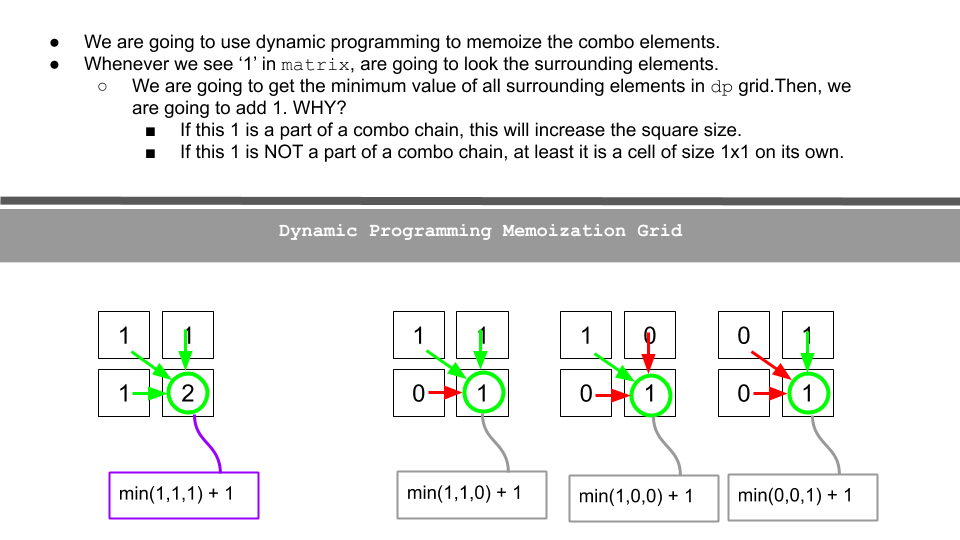





In [1]:
def maximalSquare(matrix):
    if not matrix:
        return 0
    rows,cols = len(matrix),len(matrix[0])
    dp = [[0]*(cols+1) for _ in range(rows+1)]
    max_square = 0

    for i in range(1,rows+1):
        for j in range(1,cols+1):
            if matrix[i-1][j-1] == '1':#                    
                dp[i][j] = 1 + min(dp[i-1][j],dp[i-1][j-1],dp[i][j-1])                   
                max_square = max(max_square,dp[i][j])
    return max_square*max_square
maximalSquare([["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]])

4


**Approach #3 (Better Dynamic Programming)**

since we only use dp[i+1][j], dp[i][j+1] and dp[i][j] to get dp[i+1][j+1], we can use rolling skill to optimize space to O(n).

In (i+1, j+1)'s round, we use dp[j] to get dp[i+1][j] as dp[j] has been updated at (i+1, j)'s round. We use dp[j+1] to get dp[i][j+1] as dp[j+1] hasn't been updated so it keeps old value in (i, j+1)'s round. We update dp[j+1] with calculated dp[i+1][j+1] value.

The tricky part is how to get dp[i][j] value. We need to use a variable cache to store that.

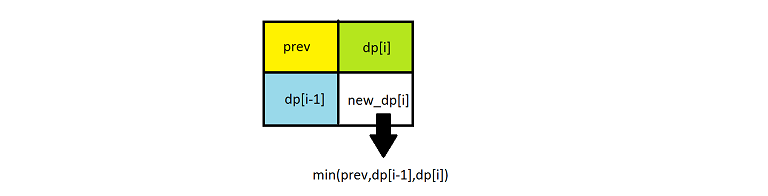

In [ ]:
def maximalSquare(matrix):
    if not matrix: return 0
    rows,cols = len(matrix),len(matrix[0])
    cur = [0]*(cols+1)
    max_len,prev_ij = 0,0
    for i in range(rows):
        for j in range(cols):                                
            if matrix[i][j] == '1':
                cur[j+1],prev_ij = 1 + min(cur[j],cur[j+1],prev_ij), cur[j+1]
                max_len = max(max_len,cur[j+1])
            else:
                cur[j+1],prev_ij = 0,cur[j+1]
            
    return max_len*max_len

##[LRU Cache](https://leetcode.com/problems/lru-cache)

The fast approach implementation is much better using OrderedDict (so that you have O(1) access time).
OrderedDict has .move_to_end() and .popitem(last=False) #last=True if you want to pop the last element, last=False if you want to pop the first element which make things way too easy.

In [ ]:
import collections
class LRUCache:

    def __init__(self, capacity: int):
        self.remain = capacity
        self.cache = collections.OrderedDict()

    def get(self, key: int) -> int:
        if key not in self.cache:
            return -1
        else:
            # update the order
            self.cache.move_to_end(key,last=True)
            return self.cache[key]
        

    def put(self, key: int, value: int) -> None:
        if key not in self.cache:# new item
            if self.remain > 0:
                self.remain -= 1
            else:
                self.cache.popitem(last=False) # FIFO
        else:
            self.cache.move_to_end(key,last=True)
        self.cache[key] = value

# Week 5 <a name = "5"></a>

##[124. Binary Tree Maximum Path Sum](https://leetcode.com/problems/binary-tree-maximum-path-sum/)


The idea is to update node values with the biggest, positive cumulative sum gathered by its children:

If both contributions are negative, no value is added.
If both are positive, only the biggest one is added, so that we don't include both children during the rest of the tree exploration.
Leaves return its own value and we recursively work our way upwards.

In [ ]:
import collections
class LRUCache:

    def __init__(self, capacity: int):
        self.remain = capacity
        self.cache = collections.defaultdict(int)
        self.queue = collections.deque()

    def get(self, key: int) -> int:
        if key not in self.cache:
            return -1
        else:
            # update the order
            self.queue.remove(key)
            self.queue.append(key)
            return self.cache[key]
        
    def put(self, key: int, value: int) -> None:
        if key not in self.cache:# new item
            if self.remain > 0:
                self.remain -= 1
            else:# remove least recent used item
                k = self.queue.popleft()
                self.cache.pop(k)
            self.queue.append(key)
        else:#update the order only
            self.queue.remove(key)
            self.queue.append(key)
            
        self.cache[key] = value

In [ ]:
class Solution:
    def maxPathSum(self, root: TreeNode) -> int:
        self.max_ans = float('-inf')
        self.dfs(root)
        return self.max_ans
        
    def dfs(self,root):
        if not root:
            return 0
        # only add positive contribution
        left_path_sum = max(0,self.dfs(root.left))
        right_path_sum = max(0,self.dfs(root.right))
        self.max_ans = max(self.max_ans,root.val + left_path_sum + right_path_sum)
        return root.val + max(left_path_sum,right_path_sum)